In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data from both sheets
file_path = r"C:\Users\jayant panwar\Desktop\test jupyter\job related\Growthify\Data Operation Test - Growify Jun'24.xlsx"
assignment_df = pd.read_excel(file_path, sheet_name='Assignment')
data_df = pd.read_excel(file_path, sheet_name='Data')

# Display the first few rows of each sheet
assignment_preview = assignment_df.head()
data_preview = data_df.head()

assignment_preview, data_preview


(   S.No                       Assignment (Jr Data Analyst)  Unnamed: 2  \
 0   NaN  DATA : Brands' Sales Data with AD Amount spent...         NaN   
 1   NaN                                                NaN         NaN   
 2  S.No  Create a ExceI and Looker Studio report contai...         NaN   
 3     1       Find the values in Table 2 In the Data sheet         NaN   
 4     2       Gross Sales & Net Sales wise Leading Country         NaN   
 
    Unnamed: 3 Unnamed: 4                                         Unnamed: 5  \
 0         NaN        NaN                                                NaN   
 1         NaN        NaN                                                NaN   
 2         NaN       S.No  Steps need to follow to complete and submit th...   
 3         NaN          1  Make a copy of this workbook or download and x...   
 4         NaN          2  Complete the assignment in the downloaded exce...   
 
   Unnamed: 6  
 0        NaN  
 1        NaN  
 2        NaN  
 3

In [3]:
# Extract the relevant instructions for Table 2 from the 'Assignment' sheet
table2_instructions = assignment_df.iloc[4, 11:].dropna().values
table2_instructions


array([], dtype=object)

# Visualization

Total Gross Sales and Net Sales per Country:
  Country  Total_Gross_Sales  Total_Net_Sales
0   India         49072158.5      42829332.14

Total Sales per Brand:
  Brand Name  Total_Sales
0    Brand A   8167077.40
1    Brand B   9126370.25
2    Brand C  26188647.30
3    Brand D  10530886.18
4    Brand E  12710956.00

Return Rate per Brand:
  Brand Name  Average_Return_Rate
0    Brand A             0.569162
1    Brand B             0.475497
2    Brand C             0.326387
3    Brand D             2.837396
4    Brand E             0.394108

Ad Spend Efficiency (ROAS) per Brand:
  Brand Name  Average_ROAS
0    Brand A           inf
1    Brand B           inf
2    Brand C     11.889363
3    Brand D           inf
4    Brand E           inf

Average Order Value (AOV) per Brand:
  Brand Name  Average_AOV
0    Brand A  5750.678643
1    Brand B         -inf
2    Brand C  8179.810944
3    Brand D          inf
4    Brand E  8948.109441

Sales Trends Over Time:
      Date  Total_Gross_Sales  Tota

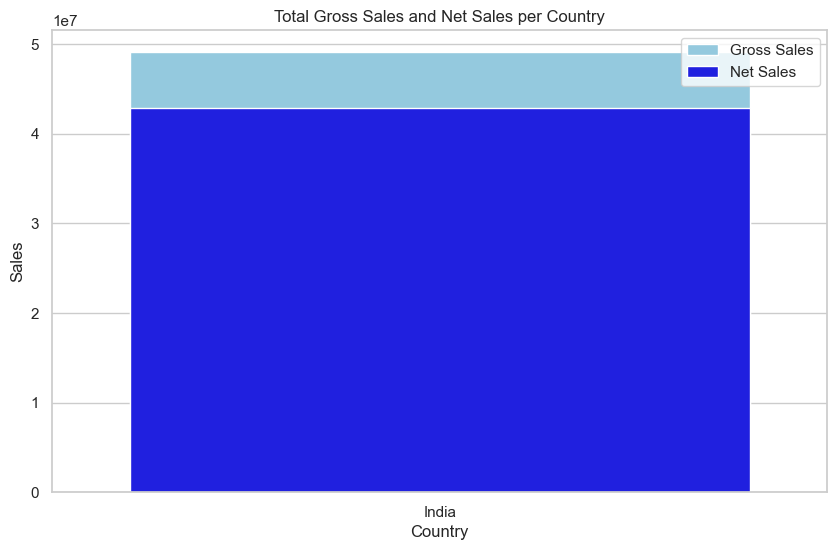

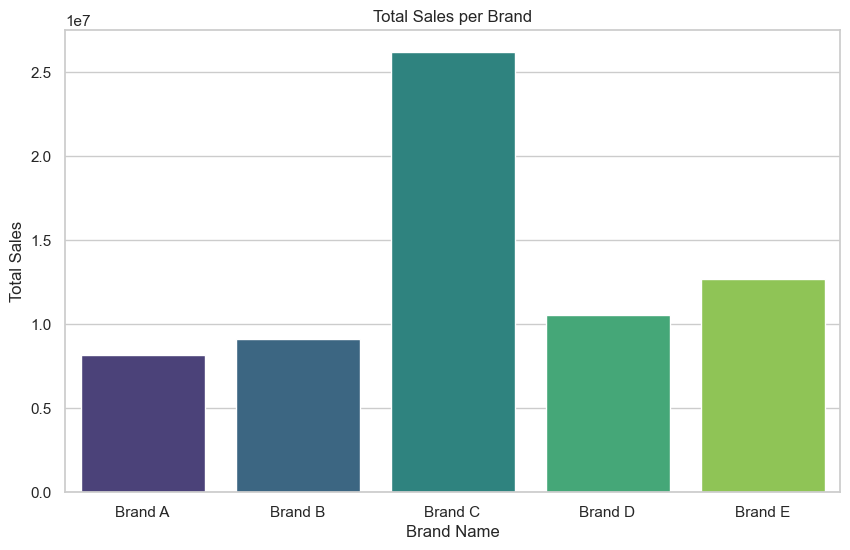

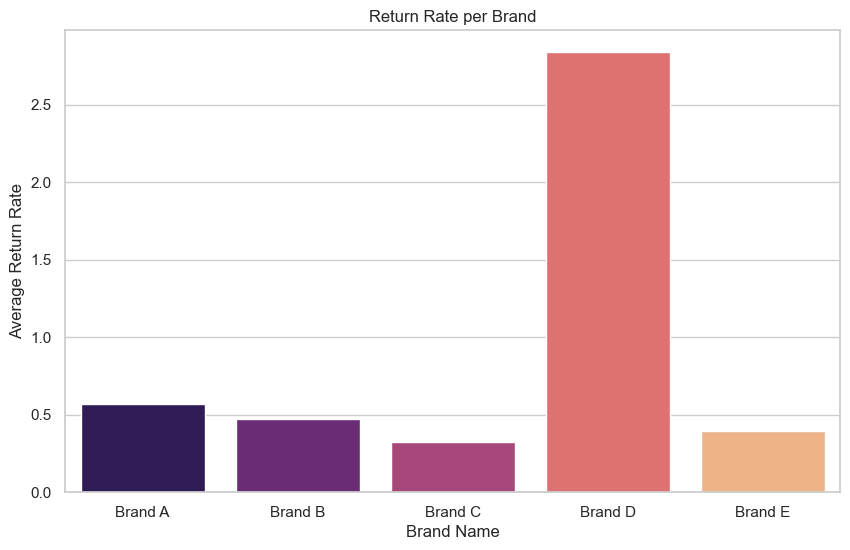

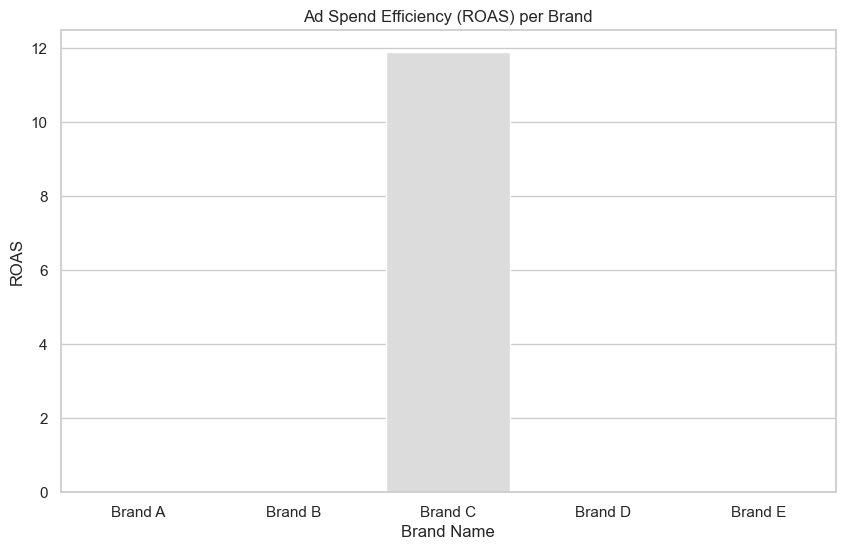

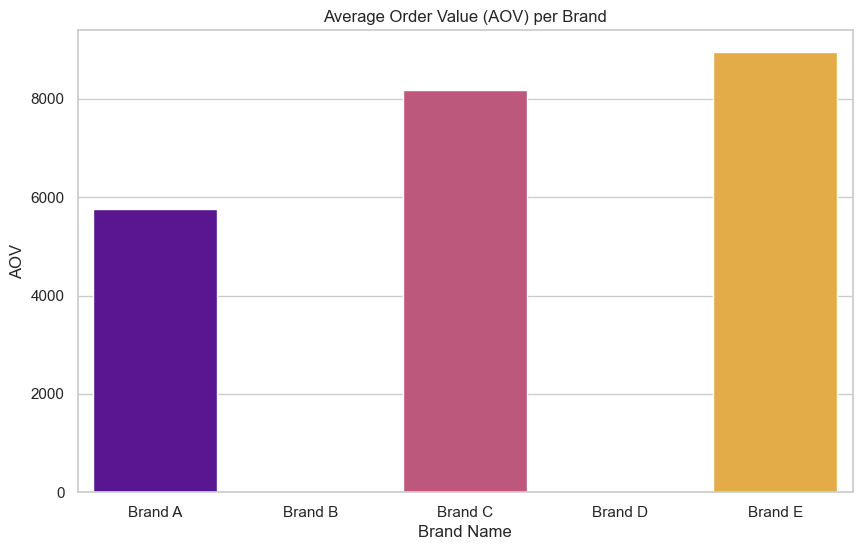

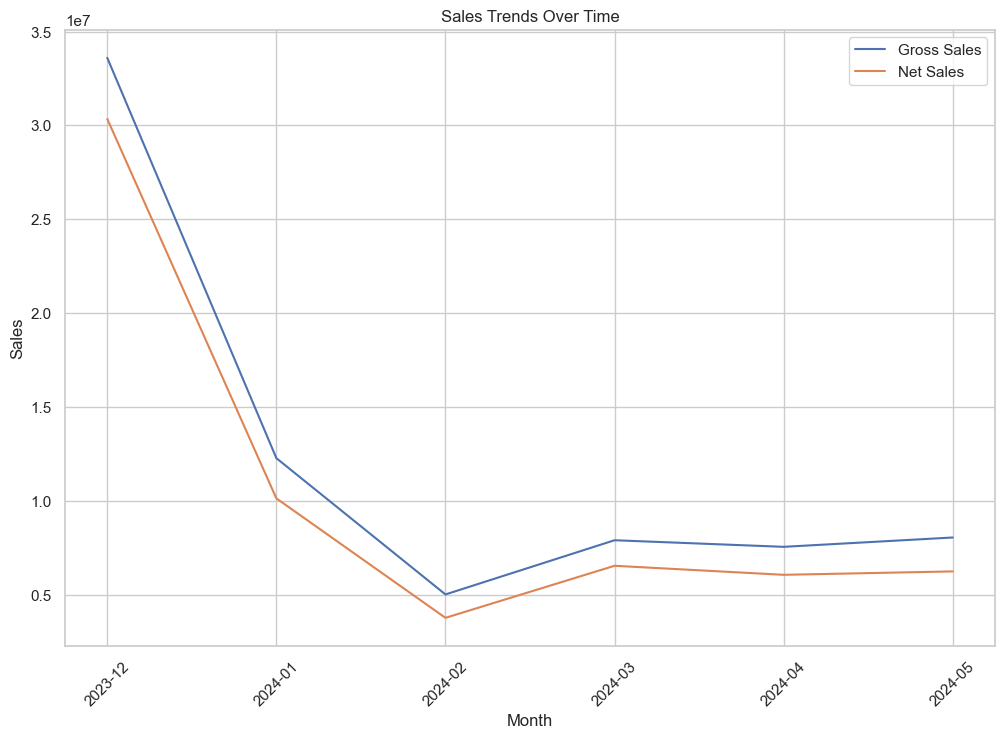

In [12]:

# Total Gross Sales and Net Sales per Country

country_sales = data_df.groupby('Country').agg(
    Total_Gross_Sales=('Gross Sales', 'sum'),
    Total_Net_Sales=('Net Sales', 'sum')
).reset_index()
print("Total Gross Sales and Net Sales per Country:")
print(country_sales)

# Total Sales per Brand

brand_sales = data_df.groupby('Brand Name').agg(
    Total_Sales=('Total Sales', 'sum')
).reset_index()
print("\nTotal Sales per Brand:")
print(brand_sales)

# Return Rate per Brand

data_df['Return Rate'] = data_df['Return Amount'] / data_df['Gross Sales']
brand_return_rate = data_df.groupby('Brand Name').agg(
    Average_Return_Rate=('Return Rate', 'mean')
).reset_index()
print("\nReturn Rate per Brand:")
print(brand_return_rate)

# Ad Spend Efficiency (Return on Ad Spend - ROAS)

data_df['ROAS'] = data_df['Total Sales'] / data_df['Total Ad Spend ']
brand_roas = data_df.groupby('Brand Name').agg(
    Average_ROAS=('ROAS', 'mean')
).reset_index()
print("\nAd Spend Efficiency (ROAS) per Brand:")
print(brand_roas)

# Average Order Value (AOV)

data_df['AOV'] = data_df['Total Sales'] / data_df['Order Count']
brand_aov = data_df.groupby('Brand Name').agg(
    Average_AOV=('AOV', 'mean')
).reset_index()
print("\nAverage Order Value (AOV) per Brand:")
print(brand_aov)

# Sales Trends Over Time

data_df['Date'] = pd.to_datetime(data_df['Date'])
monthly_sales_trends = data_df.groupby(data_df['Date'].dt.to_period('M')).agg(
    Total_Gross_Sales=('Gross Sales', 'sum'),
    Total_Net_Sales=('Net Sales', 'sum')
).reset_index()
print("\nSales Trends Over Time:")
print(monthly_sales_trends)

# Visualization

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot Total Gross Sales and Net Sales per Country
plt.figure(figsize=(10, 6))
sns.barplot(x="Country", y="Total_Gross_Sales", data=country_sales, color="skyblue", label="Gross Sales")
sns.barplot(x="Country", y="Total_Net_Sales", data=country_sales, color="blue", label="Net Sales")
plt.title("Total Gross Sales and Net Sales per Country")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plot Total Sales per Brand
plt.figure(figsize=(10, 6))
sns.barplot(x="Brand Name", y="Total_Sales", data=brand_sales, palette="viridis")
plt.title("Total Sales per Brand")
plt.xlabel("Brand Name")
plt.ylabel("Total Sales")
plt.show()

# Plot Average Return Rate per Brand
plt.figure(figsize=(10, 6))
sns.barplot(x="Brand Name", y="Average_Return_Rate", data=brand_return_rate, palette="magma")
plt.title("Return Rate per Brand")
plt.xlabel("Brand Name")
plt.ylabel("Average Return Rate")
plt.show()

# Plot ROAS per Brand
plt.figure(figsize=(10, 6))
sns.barplot(x="Brand Name", y="Average_ROAS", data=brand_roas, palette="coolwarm")
plt.title("Ad Spend Efficiency (ROAS) per Brand")
plt.xlabel("Brand Name")
plt.ylabel("ROAS")
plt.show()

# Plot AOV per Brand
plt.figure(figsize=(10, 6))
sns.barplot(x="Brand Name", y="Average_AOV", data=brand_aov, palette="plasma")
plt.title("Average Order Value (AOV) per Brand")
plt.xlabel("Brand Name")
plt.ylabel("AOV")
plt.show()

# Plot Sales Trends Over Time
plt.figure(figsize=(12, 8))
monthly_sales_trends['Date'] = monthly_sales_trends['Date'].astype(str)
sns.lineplot(x="Date", y="Total_Gross_Sales", data=monthly_sales_trends, label="Gross Sales")
sns.lineplot(x="Date", y="Total_Net_Sales", data=monthly_sales_trends, label="Net Sales")
plt.title("Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.show()
